This script plots the domain of the Desert Southwest and the domain of the Colorado Plateau.

In [5]:
# import functions
# OS interaction and time
import os
import sys
import cftime
import datetime
import time
import glob
import dask
import dask.bag as db
import calendar

# math and data
import numpy as np
import netCDF4 as nc
import xarray as xr
import scipy as sp
import pandas as pd
import pickle as pickle
from sklearn import linear_model
import matplotlib.patches as mpatches
from shapely.geometry.polygon import LinearRing
import statsmodels.stats.multitest as multitest

# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib.colors as mcolors
from matplotlib.gridspec import GridSpec

from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.axes_grid1.axes_divider import HBoxDivider
import mpl_toolkits.axes_grid1.axes_size as Size
from mpl_toolkits.axes_grid1 import make_axes_locatable

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

# random
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

In [6]:
plot_out_path = '/glade/u/home/zcleveland/NAM_soil-moisture/ERA5_analysis/plots/'  # path to generated figures
invariant_path = '/glade/u/home/zcleveland/scratch/ERA5/invariants/'  # path to invariant variables

In [51]:
# dictionary of regions and their names
region_avg_dict = {
    'cp': 'Colorado Plateau',
    'mr': 'Mogollon Rim',
    'son': 'Sonoran Desert',
    'chi': 'Chihuahuan Desert',
    'moj': 'Mojave Desert',
    'dsw': 'Desert Southwest',
}

# dictionary of regions and their coordinate boundaries
# [WEST, EAST, NORTH, SOUTH] -- WEST and EAST are on 0-360 latitude grid system
region_avg_coords = {
    'cp': [249, 253, 39, 35],
    'mr': [249, 251, 33, 34],
    'son': [246, 250, 28, 32],
    'chi': [252, 256, 29, 33],
    'moj': [243, 247, 33, 37],
    'dsw': [240, 260, 40, 20],
}

# dictionary of colors for the plot of each region
region_colors_dict = {
    'cp': 'blue',
    'mr': 'darkorange',
    'son': 'green',
    'chi': 'red',
    'moj': 'purple',
    'dsw': 'brown',
}

In [52]:
# define a function to plot the boundaries for the domains
def plot_domain(region_coords, names, colors, **kwargs):
    fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent([-130, -90, 10, 50], crs=ccrs.PlateCarree())

    ax.add_feature(cfeature.COASTLINE, edgecolor='black')
    ax.add_feature(cfeature.STATES, edgecolor='gray')
    ax.add_feature(cfeature.BORDERS, edgecolor='gray')
    ax.set_facecolor('lightgray')
    ax.add_feature(cfeature.OCEAN, color='white')

    # # draw the red box for "Desert Southwest"
    # desert_sw_box = {
    #     'lon': [-120, -100, -100, -120, -120],
    #     'lat': [20, 20, 40, 40, 20]
    # }
    # ax.plot(desert_sw_box['lon'], desert_sw_box['lat'], color='black', linewidth=2, transform=ccrs.PlateCarree())
    # ax.text(-115, 18, 'Desert Southwest', color='black', fontsize=12, weight='bold', transform=ccrs.PlateCarree())

    for region, coords in region_coords.items():
        lon = [coords[0], coords[1], coords[1], coords[0], coords[0]]
        lat = [coords[2], coords[2], coords[3], coords[3], coords[2]]
        ax.plot(lon, lat, color=colors[region], linewidth=2, transform=ccrs.PlateCarree())

    # Plot the legend in the lower left corner
    for i, (region, name) in enumerate(names.items()):
        plt.text(-129, 25 - i * 2, f"{name}", color=colors[region], fontsize=15, weight='bold')

    gl = ax.gridlines(draw_labels=True, linestyle='--')
    gl.xlabels_top = True
    gl.ylabels_right = True
    gl.xlines = True
    gl.ylines = True
    gl.xlocator = plt.FixedLocator(range(-130, -89, 5))
    gl.ylocator = plt.FixedLocator(range(10, 51, 5))

    fig.subplots_adjust(top=0.9)
    fig.suptitle('Study Domain')

    plt.show()

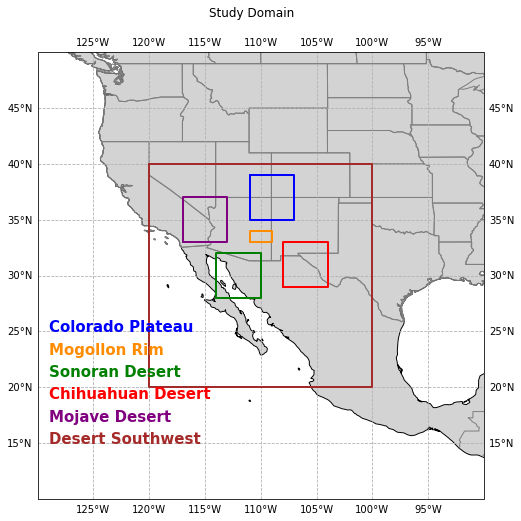

In [53]:
plot_domain(region_avg_coords, region_avg_dict, region_colors_dict)

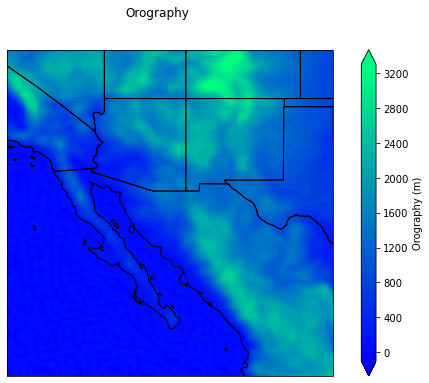

In [51]:
# plot the orography over the domain
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

ds = xr.open_dataset(os.path.join(invariant_path, 'elevation_invariant.nc'))
da = ds['Z'].sel(latitude=slice(40,20), longitude=slice(240,260), drop=True)

vmin = round(int(da.min().values), -2)
vmax = round(int(da.max().values), -2)
levels = np.arange(vmin, vmax, 100)
cf = plt.contourf(da.longitude, da.latitude, da,
                  levels=levels, cmap = 'winter', extend='both')
plt.colorbar(cf, ax=ax, label='Orography (m)')

# add map features
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.STATES, edgecolor='black')
ax.add_feature(cfeature.BORDERS, edgecolor='black')

fig.suptitle('Orography')

# plt.savefig(f'{plot_out_path}elevation.png', dpi=1000, bbox_inches='tight')
plt.show()